1단계 : CSV 파일을 읽어들이기
 
2단계 :DAU 데이터에 Install 데이터를 결합시키기 
 
3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기  
 
4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서  넣기  
 
5단계 : 월차 집계를 위한 월 항목 컬럼 추가    
 
6단계 :추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)
 
7단계 :신규 유저인지 기존 유저인지 구분하는 항목의 새 컬럼변수 추가

8단계 :로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
 
9단계 : 그래프로 데이터 시각화 

In [64]:
#1단계 : CSV 파일을 읽어들이기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dau = pd.read_csv('./datas/game_ws1_datas/dau.csv').drop('app_name', axis = 1)
dpu = pd.read_csv('./datas/game_ws1_datas/dpu.csv').drop('app_name', axis = 1)
install = pd.read_csv('./datas/game_ws1_datas/install.csv').drop('app_name', axis = 1)

In [63]:
dau

,log_date,user_id
0,2013-06-01,116
1,2013-06-01,13491
2,2013-06-01,7006
3,2013-06-01,117
4,2013-06-01,13492
...,...,...
139107,2013-07-31,29326
139108,2013-07-31,29327
139109,2013-07-31,29328
139110,2013-07-31,29329


In [65]:
dau.dtypes

log_date    object
user_id      int64
dtype: object

In [66]:
install.dtypes

install_date    object
user_id          int64
dtype: object

In [67]:
dpu.dtypes

log_date    object
user_id      int64
payment      int64
dtype: object

In [75]:
#2단계 :DAU 데이터에 Install 데이터를 결합시키기 
df1.set_index('user_id', inplace = True)

df1 = pd.merge(dau, install, on = 'user_id', how = 'outer')

In [91]:
#3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기  
total_df = pd.merge(df1, dpu, on = ['user_id', 'log_date'], how = 'outer')

In [114]:
#4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서  넣기  
total_df['payment'].fillna(0, inplace = True)

In [120]:
#5단계 : 월차 집계를 위한 월 항목 컬럼 추가  
total_df[['log_date', 'install_date']] = total_df[['log_date', 'install_date']].apply(pd.to_datetime)
total_df['month'] = total_df['log_date'].dt.to_period(freq = 'M')

In [305]:
#6단계 :추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)
monthly_sum = total_df.groupby('month')['payment'].sum()
print(monthly_sum)

month
2013-06    2277230.0
2013-07    2070850.0
Freq: M, Name: payment, dtype: float64


In [132]:
total_df

,log_date,user_id,install_date,payment,month
0,2013-06-01,116,2013-04-17,0.0,2013-06
1,2013-06-02,116,2013-04-17,0.0,2013-06
2,2013-06-03,116,2013-04-17,0.0,2013-06
3,2013-06-04,116,2013-04-17,0.0,2013-06
4,2013-06-05,116,2013-04-17,0.0,2013-06
...,...,...,...,...,...
146747,NaT,13481,2013-05-31,0.0,NaT
146748,NaT,13482,2013-05-31,0.0,NaT
146749,NaT,13483,2013-05-31,0.0,NaT
146750,NaT,13489,2013-05-31,0.0,NaT


In [167]:
#7단계 :신규 유저인지 기존 유저인지 구분하는 항목의 새 컬럼변수 추가
total_df['new'] = 0
for k in range(len(total_df)):
    if total_df['log_date'][k] == total_df['install_date'][k] or pd.isnull(total_df['log_date'][k]):
        total_df['new'][k] = 'new'
    else:
        total_df['new'][k] = 'returning'

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\student\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [173]:
total_df.to_csv('./workshop1.csv')

In [306]:
#8단계 :로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
sum_df = total_df.groupby(['new', 'month'])['payment'].sum()

print(sum_df.unstack())

month        2013-06    2013-07
new                            
new          76230.0    61950.0
returning  2201000.0  2008900.0


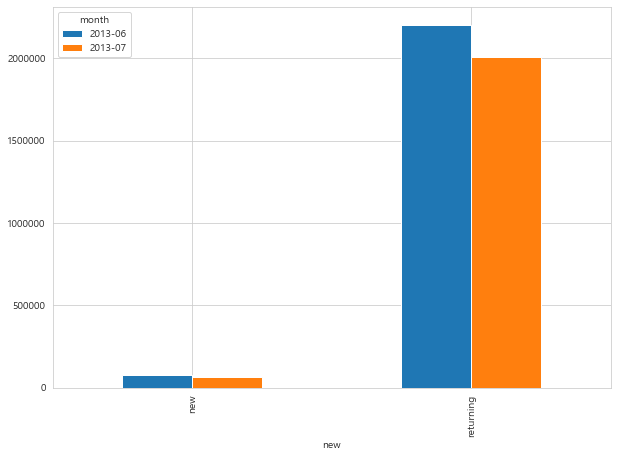

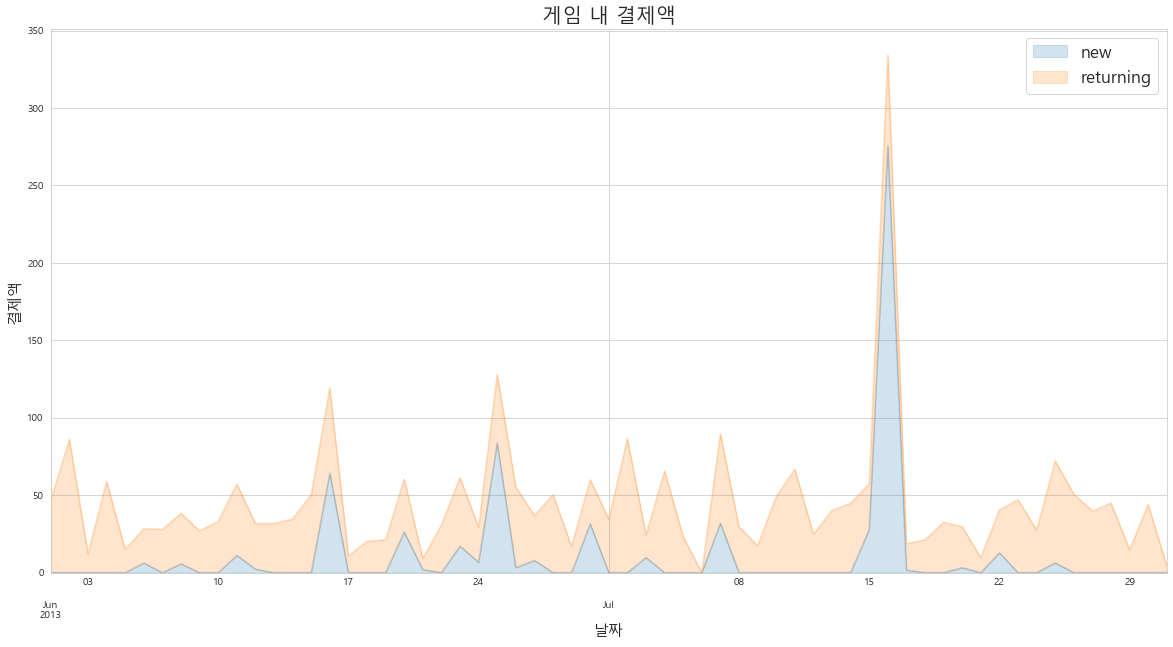

In [304]:
#9단계 : 그래프로 데이터 시각화

#그래프1(bar)
sum_df.unstack().plot(kind = 'bar', figsize = (10, 7))
plt.show()

graph_df = total_df.pivot_table(index='new', columns = 'log_date', values = 'payment').T

#그래프2(area)
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts\Malgun.ttf'     
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
graph_df.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))  

plt.title('게임 내 결제액', size = 20)
plt.xlabel('날짜', size = 15)
plt.ylabel('결제액', size = 15)
plt.legend(loc = 'best', fontsize = 17)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

month
2013-06    2277230.0
2013-07    2070850.0
Freq: M, Name: payment, dtype: float64


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\student\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


month        2013-06    2013-07
new                            
new          76230.0    61950.0
returning  2201000.0  2008900.0


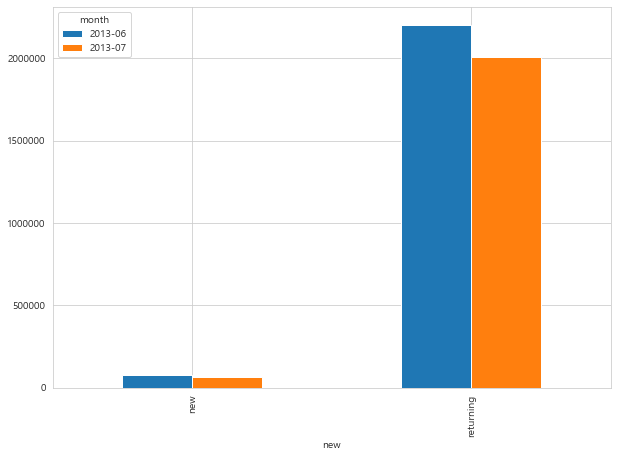

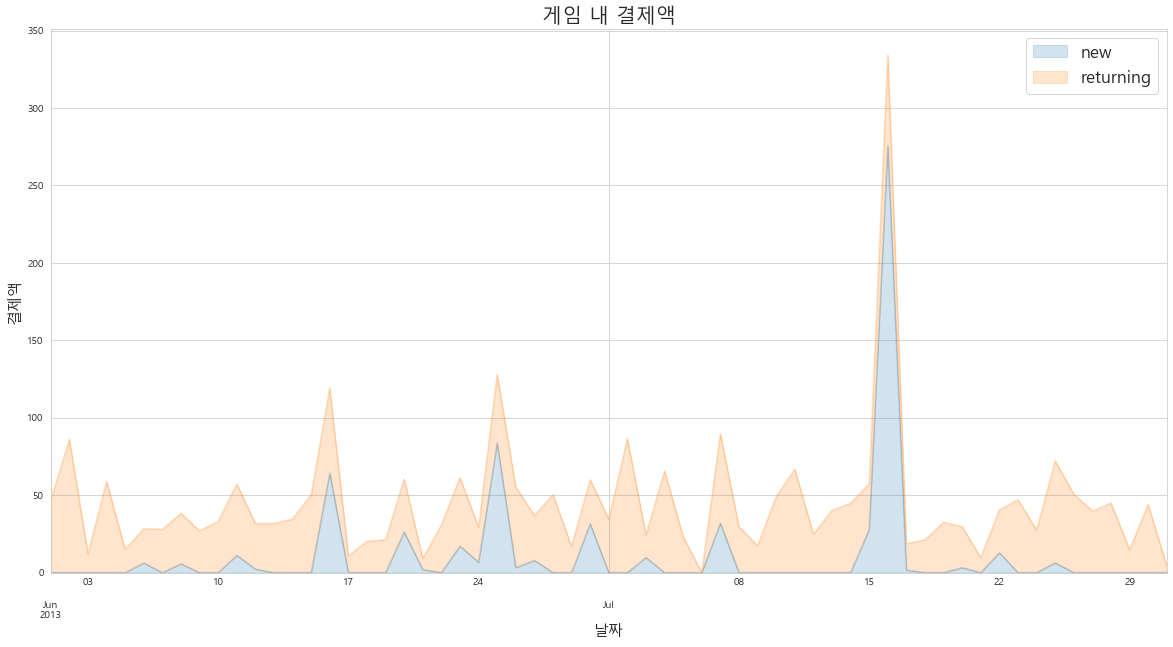

In [313]:
#1단계 : CSV 파일을 읽어들이기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dau = pd.read_csv('./datas/game_ws1_datas/dau.csv').drop('app_name', axis = 1)
dpu = pd.read_csv('./datas/game_ws1_datas/dpu.csv').drop('app_name', axis = 1)
install = pd.read_csv('./datas/game_ws1_datas/install.csv').drop('app_name', axis = 1)

#2단계 :DAU 데이터에 Install 데이터를 결합시키기 
df1.set_index('user_id', inplace = True)

df1 = pd.merge(dau, install, on = 'user_id', how = 'outer')

#3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기  
total_df = pd.merge(df1, dpu, on = ['user_id', 'log_date'], how = 'outer')

#4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서  넣기  
total_df['payment'].fillna(0, inplace = True)

#5단계 : 월차 집계를 위한 월 항목 컬럼 추가  
total_df[['log_date', 'install_date']] = total_df[['log_date', 'install_date']].apply(pd.to_datetime)
total_df['month'] = total_df['log_date'].dt.to_period(freq = 'M')

#6단계 :추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)
monthly_sum = total_df.groupby('month')['payment'].sum()
print(monthly_sum)
#7단계 :신규 유저인지 기존 유저인지 구분하는 항목의 새 컬럼변수 추가
total_df['new'] = 0
for k in range(len(total_df)):
    if total_df['log_date'][k] == total_df['install_date'][k] or pd.isnull(total_df['log_date'][k]):
        total_df['new'][k] = 'new'
    else:
        total_df['new'][k] = 'returning'

#8단계 :로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
sum_df = total_df.groupby(['new', 'month'])['payment'].sum()
print(sum_df.unstack())

#9단계 : 그래프로 데이터 시각화

#그래프1(bar)
sum_df.unstack().plot(kind = 'bar', figsize = (10, 7))
plt.show()

graph_df = total_df.pivot_table(index='new', columns = 'log_date', values = 'payment').T

#그래프2(area)
from matplotlib import font_manager, rc
font_path='C:/Windows/Fonts/Malgun.ttf'
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
graph_df.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))

plt.title('게임 내 결제액', size = 20)
plt.xlabel('날짜', size = 15)
plt.ylabel('결제액', size = 15)
plt.legend(loc = 'best', fontsize = 17)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()